# Machine Learning (SIA)

## Clustering 

by Clément Bouvier 

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("C:\\Users\\hp\\Desktop\\3A-SIA\\ML\Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles             

<module 'matplotlib.pyplot' from 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

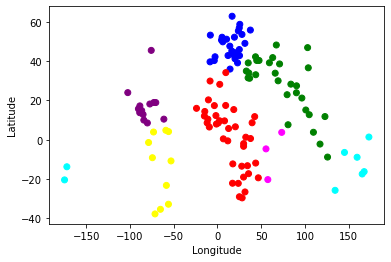

In [86]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt

**QUESTION 1**

Identify each class with the plot colors.

What do the coordinates correspond to?

**TO DO 1.2**

Execute the following cell


<module 'matplotlib.pyplot' from 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

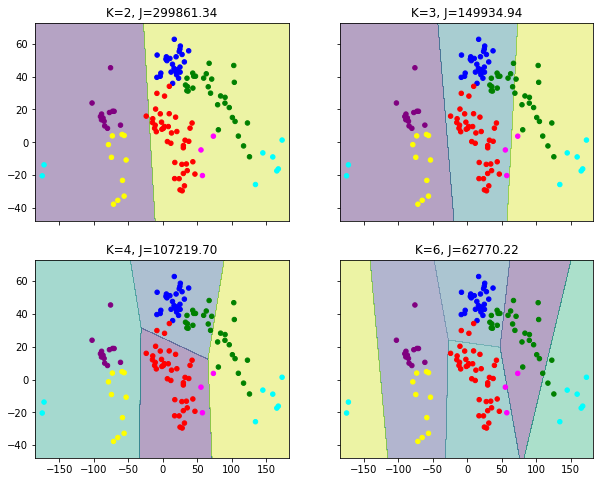

In [87]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

**QUESTION 2**

How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?

Which is the main problem with the mercator representation for continent detection?

## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

In [89]:
# Displace the origin of longitude to 30° east
longitude_shift = 30.0  # Degrees to shift
df1.loc[df1.index, 'Longitude'] = df1['Longitude'] - longitude_shift

**QUESTION 3**

What are the advantages of this normalization?

**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

<module 'matplotlib.pyplot' from 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

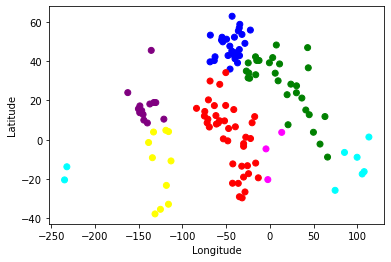

In [90]:
df_X2 = df1[['Longitude', 'Latitude']]

np2 = df_X2.to_numpy()
plt.scatter(np2[:,0], np2[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

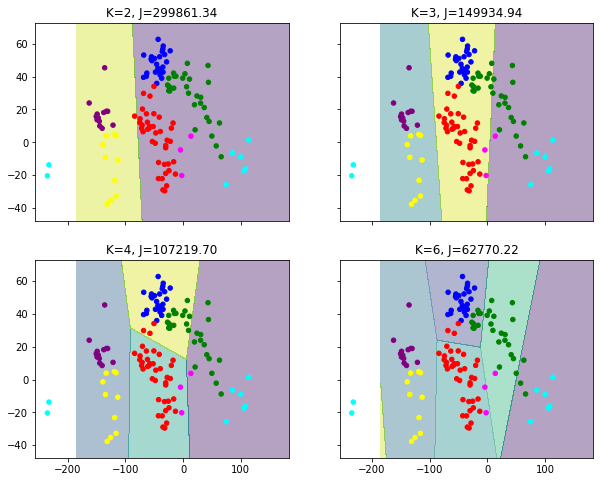

In [91]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np2)
km3 = cluster.KMeans(n_clusters=3).fit(np2)
km4 = cluster.KMeans(n_clusters=4).fit(np2)
km6 = cluster.KMeans(n_clusters=6).fit(np2)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np2[:, 0], np2[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

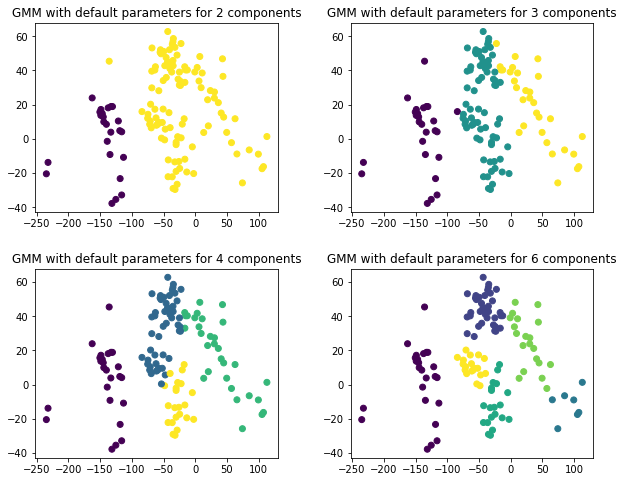

In [92]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming df1 contains your normalized dataset after the longitude shift

# Define the range of components (clusters) you want to test
n_components_list = [2, 3, 4, 6]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)


    
for i, n_components in enumerate(n_components_list):
    # Create a GMM model with diagonal covariance and the specified number of components
    gmm = GaussianMixture(n_components=n_components, random_state=0)

    # Fit the model to your data
    gmm.fit(df1[['Longitude', 'Latitude']])  # Assuming 'Longitude' and 'Latitude' are the column names

    # Get the cluster assignments for each data point
    cluster_labels = gmm.predict(df1[['Longitude', 'Latitude']])

    # Visualize the clustering results in the ith subplot
    ax = axes[i // 2, i % 2]  # Select the subplot based on the index
    ax.scatter(df1['Longitude'], df1['Latitude'], c=cluster_labels)
    ax.set_title(f'GMM with default parameters for {n_components} components')

# Show the plot with subplots
plt.show()

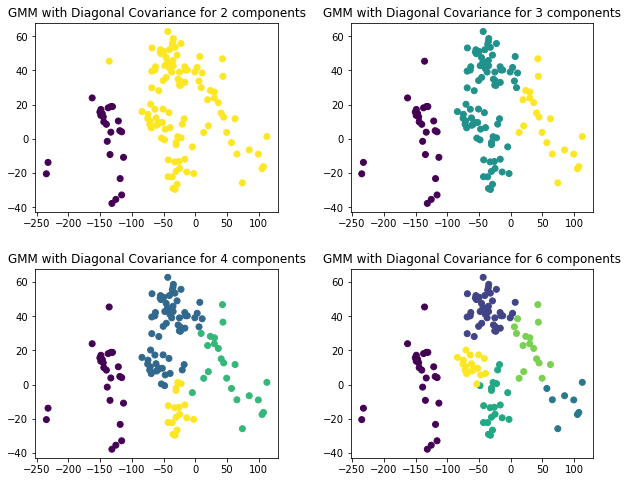

In [93]:
import matplotlib.pyplot as plt

# Assuming df1 contains your normalized dataset after the longitude shift

# Define the range of components (clusters) you want to test
n_components_list = [2, 3, 4, 6]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Loop through different numbers of components
for i, n_components in enumerate(n_components_list):
    # Create a GMM model with diagonal covariance and the specified number of components
    gmm = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)

    # Fit the model to your data
    gmm.fit(df1[['Longitude', 'Latitude']])  # Assuming 'Longitude' and 'Latitude' are the column names

    # Get the cluster assignments for each data point
    cluster_labels = gmm.predict(df1[['Longitude', 'Latitude']])

    # Visualize the clustering results in the ith subplot
    ax = axes[i // 2, i % 2]  # Select the subplot based on the index
    ax.scatter(df1['Longitude'], df1['Latitude'], c=cluster_labels)
    ax.set_title(f'GMM with Diagonal Covariance for {n_components} components')

# Show the plot with subplots
plt.show()


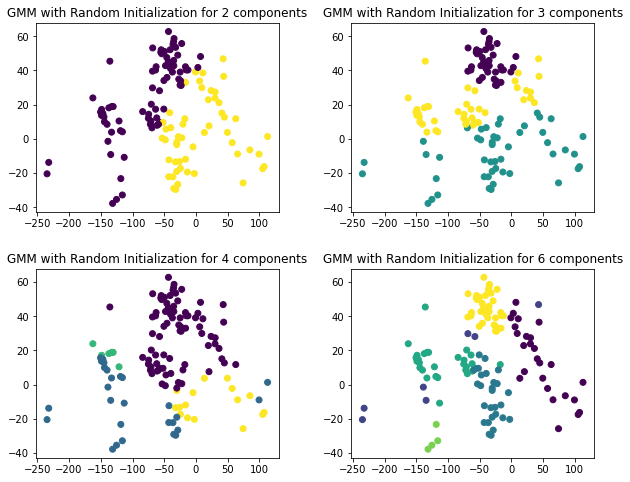

In [94]:
import matplotlib.pyplot as plt

# Assuming df1 contains your normalized dataset after the longitude shift

# Define the range of components (clusters) you want to test
n_components_list = [2, 3, 4, 6]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Loop through different numbers of components
for i, n_components in enumerate(n_components_list):
    # Create a GMM model with diagonal covariance and the specified number of components
    gmm = GaussianMixture(n_components=n_components, random_state=0, init_params='random')

    # Fit the model to your data
    gmm.fit(df1[['Longitude', 'Latitude']])  # Assuming 'Longitude' and 'Latitude' are the column names

    # Get the cluster assignments for each data point
    cluster_labels = gmm.predict(df1[['Longitude', 'Latitude']])

    # Visualize the clustering results in the ith subplot
    ax = axes[i // 2, i % 2]  # Select the subplot based on the index
    ax.scatter(df1['Longitude'], df1['Latitude'], c=cluster_labels)
    ax.set_title(f'GMM with Random Initialization for {n_components} components')

# Show the plot with subplots
plt.show()


**QUESTION 4**

Which is the best method to detect continents?

* Kmeans

For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?

**BONUS**

Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

C:\Users\hp\AppData\Local\Temp/ipykernel_3980/2107096907.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x'] = np.cos(np.radians(df1['Latitude'])) * np.cos(np.radians(df1['Longitude']))
C:\Users\hp\AppData\Local\Temp/ipykernel_3980/2107096907.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'] = np.cos(np.radians(df1['Latitude'])) * np.sin(np.radians(df1['Longitude']))
C:\Users\hp\AppData\Local\Temp/ipykernel_3980/2107096907.py:12: SettingWithCopyWarning: 
A value is trying to be set on 

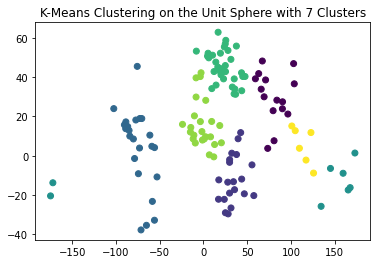

In [97]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Assuming df1 contains your dataset with latitude and longitude

# Convert latitude and longitude to spherical coordinates
df1['x'] = np.cos(np.radians(df1['Latitude'])) * np.cos(np.radians(df1['Longitude']))
df1['y'] = np.cos(np.radians(df1['Latitude'])) * np.sin(np.radians(df1['Longitude']))
df1['z'] = np.sin(np.radians(df1['Latitude']))

# Select the number of clusters (K) you want to find
n_clusters = 7  # Example: You can adjust this based on your requirements

# Define a custom KMeans class with cosine similarity as the distance metric
class KMeansWithCosine(KMeans):
    def __init__(self, n_clusters, max_iter=300):
        super().__init__(n_clusters=n_clusters, max_iter=max_iter)

    def fit(self, X):
        # Compute cosine similarity as a distance metric
        self.cosine_distances = pairwise_distances(X, metric="cosine")
        super().fit(self.cosine_distances)

# Create the custom KMeans model with cosine similarity as the distance metric
kmeans = KMeansWithCosine(n_clusters=n_clusters)

# Fit the model to the spherical coordinates
kmeans.fit(df1[['x', 'y', 'z']])

# Get cluster assignments
cluster_labels = kmeans.labels_

# Visualize the clustering results or perform further analysis
# You can use scatter plots or other visualization techniques to display the results

# For example, to create a scatter plot with points colored by cluster
plt.scatter(df1['Longitude'], df1['Latitude'], c=cluster_labels)
plt.title(f'K-Means Clustering on the Unit Sphere with {n_clusters} Clusters')
plt.show()


## STEP 3: Detection of caribbean island 

**TO CODE 3.1**

Isolate the North and South American continents.

In [109]:
# Filter the DataFrame to isolate North and South America
north_america = df1[(df1['Continent'] == 'North America')]
south_america = df1[(df1['Continent'] == 'South America')]

In [131]:
# Printing 'Country' and 'Longitude' for North America
print("North America:")
print(north_america[['Country','Latitude', 'Longitude']])

# Printing 'Country' and 'Longitude' for South America
print("South America:")
print(south_america[['Country','Latitude', 'Longitude']])


North America:
                  Country   Latitude   Longitude
258                Belize  17.200275  -88.710105
498                Canada  45.424724  -75.697000
627            Costa Rica   9.976345  -84.192088
772    Dominican Republic  18.894331  -70.505689
820           El Salvador  13.739437  -88.871645
1060            Guatemala  15.694037  -90.364820
1124                Haiti  18.935026  -72.685275
1140             Honduras  14.826882  -86.615166
1300              Jamaica  18.156949  -77.314826
1685               Mexico  23.947537 -102.523452
1863            Nicaragua  12.847094  -85.030530
1961               Panama   8.517508  -80.119152
2651  Trinidad and Tobago  10.457334  -61.265679
South America:
        Country   Latitude  Longitude
82    Argentina -35.381349 -65.179807
354      Brazil -10.787777 -53.097831
546       Chile -37.730710 -71.382562
578    Colombia   3.913834 -73.081146
788     Ecuador  -1.423816 -78.752019
1108     Guyana   4.793780 -58.982025
1993   Paraguay -2

**TO CODE 3.2**

Propose a methodology to create a cluster including caribbean independent nations.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


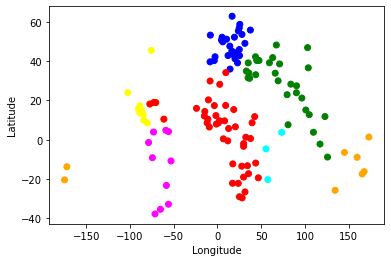

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Assuming you have already defined df_X, df_Y, np_Y, np1, and the color map

# Define a list of Caribbean islands and their coordinates
caribbean_islands = [
    {'Country': 'Jamaica', 'Latitude': 18.1096, 'Longitude': -77.2975},
    {'Country': 'Haiti', 'Latitude': 18.156949, 'Longitude': -72.685275},
    {'Country': 'Dominican Republic', 'Latitude': 18.894331, 'Longitude': -70.505689},
    {'Country': 'Trinidad and Tobago', 'Latitude': 10.457334, 'Longitude': -61.265679},
]

# Filter the data to include only the Caribbean islands
caribbean_data = df1[df1['Country'].isin([island['Country'] for island in caribbean_islands])]

# Use K-Means clustering to create a cluster for the Caribbean islands
n_clusters = 1  # One cluster for the Caribbean islands
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(caribbean_data[['Latitude', 'Longitude']])
caribbean_cluster = kmeans.labels_

# Extend the color map to include a color for the new Caribbean cluster
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan', 'orange']  # Add 'orange' for the Caribbean cluster

# Visualize all clusters with the modified color map
plt.scatter(np1[:, 0], np1[:, 1], c=np_Y, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(caribbean_data['Longitude'], caribbean_data['Latitude'], c=caribbean_cluster, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**QUESTION 5**

Which is the outlier of this clustering problem?

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

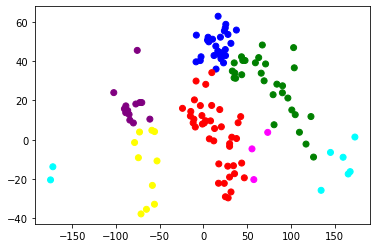

In [147]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()

longitude_shift = 30.0  # Degrees to shift
#df_X.loc[df_X.index, 'Longitude'] = df_X['Longitude'] - longitude_shift

In [148]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5340874135890118


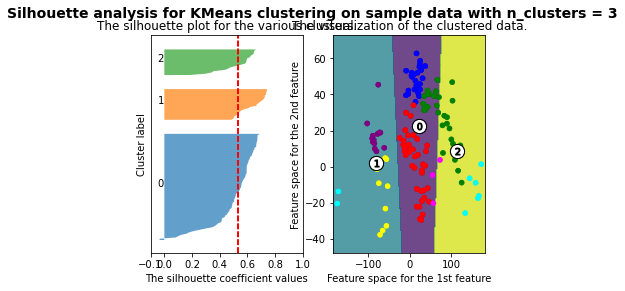

In [149]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

For n_clusters = 2 The average silhouette_score is: 0.5342317632135227


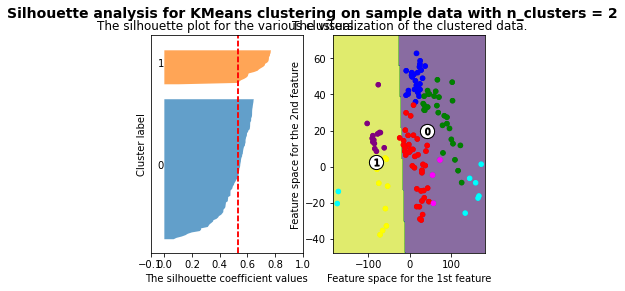

For n_clusters = 3 The average silhouette_score is: 0.5340874135890118


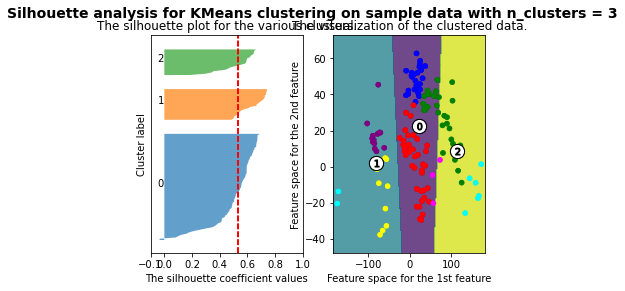

For n_clusters = 4 The average silhouette_score is: 0.4790634593010831


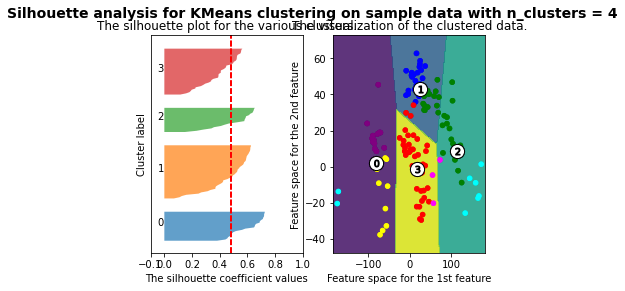

For n_clusters = 6 The average silhouette_score is: 0.5071538883530766


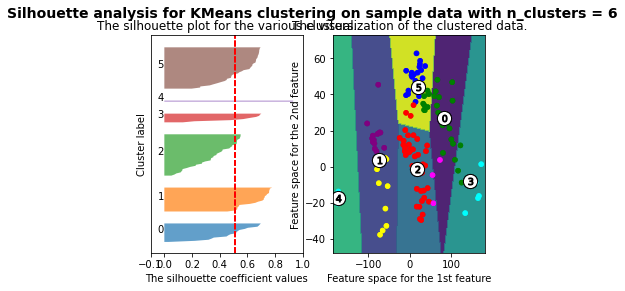

In [150]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Define a list of values of K for which you want to perform silhouette analysis
K_values = [2, 3, 4, 6]

# Iterate over each value of K
for K in K_values:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np1) + (K + 1) * 10])

    km = cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = km.fit_predict(np1)

    silhouette_avg = silhouette_score(np1, cluster_labels)
    print("For n_clusters =", K, "The average silhouette_score is:", silhouette_avg)
    sample_silhouette_values = silhouette_samples(np1, cluster_labels)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for the average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the y-axis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax2.contourf(xx, yy, Z, alpha=0.4)
        ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                    s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

        # Labeling the clusters
        centers = km.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",  # Remove the extra comma here
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % K,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()


**Question 6** 

According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.

According to the silhouette score and the silhouette analysis, the most relevant value for K = 2

**BONUS** 

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

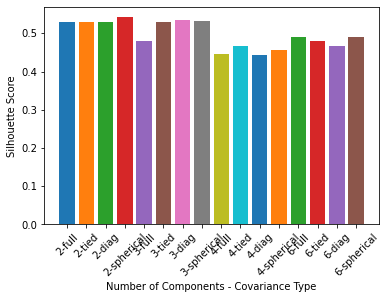

In [152]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of components and covariance types to test
n_components_range = [2, 3, 4, 6]
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Create a list to store silhouette scores for each combination
silhouette_scores = []

# Define your data (assuming you have a dataset np1)
data = np1

# Loop through different combinations
for n_components in n_components_range:
    for cov_type in covariance_types:
        # Create a Gaussian Mixture model with the current parameters
        gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=0)
        
        # Fit the model to the data
        gmm.fit(data)
        
        # Predict cluster labels
        cluster_labels = gmm.predict(data)
        
        # Calculate the silhouette score for the current combination
        silhouette_avg = silhouette_score(data, cluster_labels)
        
        # Store the silhouette score and combination parameters
        silhouette_scores.append((n_components, cov_type, silhouette_avg))

# Visualize the results
fig, ax = plt.subplots()
for n_components, cov_type, silhouette_avg in silhouette_scores:
    ax.bar(f'{n_components}-{cov_type}', silhouette_avg, label=f'{n_components}-{cov_type}')

ax.set_ylabel('Silhouette Score')
ax.set_xlabel('Number of Components - Covariance Type')
plt.xticks(rotation=45)
#plt.legend()
plt.show()


**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

In [153]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score

# Assuming you have np_Y containing the continent labels
# and np1 as your data

# Define a range of values for K (number of clusters)
k_values = [2, 3, 4, 6]

# Create a dictionary to store homogeneity scores for each K
homogeneity_scores = {}

# Loop through different values of K
for k in k_values:
    # Create a K-Means model with K clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to your data
    cluster_labels = kmeans.fit_predict(np1)
    
    # Compute the homogeneity score using the ground truth labels (continent labels)
    homogeneity = homogeneity_score(np_Y, cluster_labels)
    
    # Store the homogeneity score for this K
    homogeneity_scores[k] = homogeneity

# Print the homogeneity scores for different K values
for k, score in homogeneity_scores.items():
    print(f'K={k}: Homogeneity Score = {score}')


K=2: Homogeneity Score = 0.25137872944867407
K=3: Homogeneity Score = 0.41607303047189803
K=4: Homogeneity Score = 0.6165380260544358
K=6: Homogeneity Score = 0.71187269395106


**Question 7**

According to the homogeneity score, which is the most relevant value of K ?

K= 6

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

In [154]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import homogeneity_score

# Assuming you have np_Y containing the continent labels
# and np1 as your data

# Define the range of components and covariance types to test
n_components_range = [2, 3, 4, 6]
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Create a list to store homogeneity scores for each combination
homogeneity_scores = []

# Define your data (assuming you have a dataset np1)
data = np1

# Loop through different combinations
for n_components in n_components_range:
    for cov_type in covariance_types:
        # Create a Gaussian Mixture model with the current parameters
        gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=0)
        
        # Fit the model to the data
        gmm.fit(data)
        
        # Predict cluster labels
        cluster_labels = gmm.predict(data)
        
        # Calculate the homogeneity score for the current combination using ground truth labels
        homogeneity = homogeneity_score(np_Y, cluster_labels)
        
        # Store the homogeneity score and combination parameters
        homogeneity_scores.append((n_components, cov_type, homogeneity))

# Visualize the results
for n_components, cov_type, homogeneity in homogeneity_scores:
    print(f'{n_components}-{cov_type}: Homogeneity Score = {homogeneity}')


2-full: Homogeneity Score = 0.24364149392494214
2-tied: Homogeneity Score = 0.24364149392494214
2-diag: Homogeneity Score = 0.24364149392494214
2-spherical: Homogeneity Score = 0.26607034683731073
3-full: Homogeneity Score = 0.4420731154256634
3-tied: Homogeneity Score = 0.38865039866872014
3-diag: Homogeneity Score = 0.4035015088879325
3-spherical: Homogeneity Score = 0.3996916108707983
4-full: Homogeneity Score = 0.5619901060315893
4-tied: Homogeneity Score = 0.610912132650653
4-diag: Homogeneity Score = 0.4826209405114929
4-spherical: Homogeneity Score = 0.5009364252795278
6-full: Homogeneity Score = 0.699129180998709
6-tied: Homogeneity Score = 0.6872458775682628
6-diag: Homogeneity Score = 0.6741148865381118
6-spherical: Homogeneity Score = 0.6981897491385064


## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 3 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.

**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?